In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model
import glob

In [19]:
path_e = "DataForValidatingModels/Eugene"
path_c = "DataForValidatingModels/Cocoa"
path_g = "DataForValidatingModels/Golden"
eug_files = glob.glob(path_e + '/*.csv')
coc_files = glob.glob(path_c + '/*.csv')
gold_files = glob.glob(path_g + '/*.csv')
all_files = coc_files + eug_files + gold_files
print(all_files)
#repeat for 3 and put them together
'''print(eug_files)
print(coc_files)
print(gold_files)'''

['DataForValidatingModels/Cocoa/Cocoa_mSi0188.csv', 'DataForValidatingModels/Cocoa/Cocoa_mSi0166.csv', 'DataForValidatingModels/Cocoa/Cocoa_xSi12922.csv', 'DataForValidatingModels/Cocoa/Cocoa_aSiMicro03036.csv', 'DataForValidatingModels/Cocoa/Cocoa_HIT05667.csv', 'DataForValidatingModels/Cocoa/Cocoa_CdTe75638.csv', 'DataForValidatingModels/Cocoa/Cocoa_CIGS8-001.csv', 'DataForValidatingModels/Cocoa/Cocoa_aSiTandem72-46.csv', 'DataForValidatingModels/Cocoa/Cocoa_aSiTriple28324.csv', 'DataForValidatingModels/Cocoa/Cocoa_CIGS39017.csv', 'DataForValidatingModels/Cocoa/Cocoa_mSi460A8.csv', 'DataForValidatingModels/Eugene/Eugene_HIT05667.csv', 'DataForValidatingModels/Eugene/Eugene_xSi12922.csv', 'DataForValidatingModels/Eugene/Eugene_aSiMicro03036.csv', 'DataForValidatingModels/Eugene/Eugene_aSiTriple28324.csv', 'DataForValidatingModels/Eugene/Eugene_CIGS8-001.csv', 'DataForValidatingModels/Eugene/Eugene_CdTe75638.csv', 'DataForValidatingModels/Eugene/Eugene_mSi0188.csv', 'DataForValidatingM

'print(eug_files)\nprint(coc_files)\nprint(gold_files)'

In [9]:
#loop over them and create dataframe for each with site number columns
for file in all_files:
    with open(file, "r") as f:
        f.readline() # skip line
        f.readline() # skip line
        lines = f.readlines()

    with open("cleaned/" + file, "w") as f:
        header = lines[0].split(",")
        f.write(",".join(header) + "\n") # write header
        for line in lines[1:]:
            f.write(",".join(line.split(",")[:len(header)]) + "\n") # write only labeled columns
li = []
for file in all_files:
    li.append("cleaned/" + file)

In [12]:
def edit_time(elem):
    return elem.split('T')[0]

cols = ["Time Stamp",
        "POA irradiance CMP22 pyranometer (W/m2)",
        "Relative humidity (%RH)",
        "PV module soiling derate"]

In [25]:
counts = {"Cocoa": 0, "Eugene": 0, "Golden": 0}
dfs = []
for file in li:
    df = pd.read_csv(file)
    df["Time Stamp"] = df["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"].apply(edit_time)
    df_filtered = df.groupby(["Time Stamp"], as_index=False).first()
    site = file.split('/')[2]
    df_filtered["Site"] = site
    df_filtered["Site Index"] = counts[site]
    if (file == "cleaned/DataForValidatingModels/Cocoa/Cocoa_mSi0166.csv") or (file == "cleaned/DataForValidatingModels/Eugene/Eugene_mSi0166.csv") or (file == "cleaned/DataForValidatingModels/Golden/Golden_mSi0247.csv"):
        df_filtered["Cleaned"] = 1
    else:
        df_filtered["Cleaned"] = 0
    counts[site] += 1
    dfs.append(df_filtered)
    
df = pd.concat(dfs)

In [22]:
df.to_csv("master.csv")

In [28]:
#display(pd.read_csv("master.csv"))

,Unnamed: 0,Time Stamp,Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss,POA irradiance CMP22 pyranometer (W/m2),POA irradiance uncertainty (%),PV module back surface temperature (degC),PV module back surface temperature uncertainty (degC),Isc (A),Isc uncertainty (%),Pmp (W),...,Diffuse horizontal irradiance standard deviation of 1-second samples of 5-second average (W/m2),Solar QA residual (W/m2) = Direct*cos(zenith) + Diffuse Horiz. Global Horiz,PV module soiling derate,Daily maintenance start time (hour: minute) - no maintenance that day = 99:99,Daily maintenance end time (hour: minute) - no maintenance that day = 99:99,Precipitation prior to daily maintenance (mm) accumulated daily total,Number of I-V curve data pairs (n),Site,Site Index,Cleaned
0,0,2011-01-21,2011-01-21T08:15:03,35.0,10.7,18.9,1.9,0.0986,2.6,1.1342,...,0.1,0.7,1.0,10:48,10:54,24.7,187,Cocoa,0,0
1,1,2011-01-22,2011-01-22T07:50:03,31.4,20.3,11.4,1.9,0.0846,4.5,0.9863,...,-9999.0,-9999.0,1.0,99:99,99:99,-9999.0,183,Cocoa,0,0
2,2,2011-01-24,2011-01-24T07:40:03,21.8,16.8,8.8,1.9,0.0587,7.1,0.6431,...,0.3,0.3,1.0,08:28,08:36,0.0,184,Cocoa,0,0
3,3,2011-01-25,2011-01-25T07:40:03,21.1,17.1,19.1,1.9,0.0565,4.5,0.5810,...,0.0,0.0,1.0,08:26,08:32,0.0,182,Cocoa,0,0
4,4,2011-01-26,2011-01-26T08:20:03,20.8,17.5,19.0,1.9,0.0584,4.3,0.6000,...,0.2,0.1,1.0,08:23,08:27,0.2,182,Cocoa,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11281,324,2013-09-19,2013-09-19T06:15:56,63.6,9.0,9.9,1.9,0.0474,2.0,1.6660,...,-9999.0,34.0,1.0,06:52,06:56,0.0,189,Golden,10,0
11282,325,2013-09-21,2013-09-21T06:15:56,67.4,9.5,13.8,1.9,0.0464,1.6,1.5028,...,-9999.0,42.0,1.0,99:99,99:99,-9999.0,189,Golden,10,0
11283,326,2013-09-22,2013-09-22T06:15:56,65.2,9.3,16.5,1.9,0.0466,1.6,1.5402,...,-9999.0,-9999.0,1.0,99:99,99:99,-9999.0,188,Golden,10,0
11284,327,2013-09-23,2013-09-23T07:00:56,79.5,5.8,15.1,1.9,0.0904,0.9,4.2498,...,-9999.0,-0.5,1.0,07:02,07:05,6.4,188,Golden,10,0


In [11]:
df[cols+["Site","Site Index"] ]

,Time Stamp,POA irradiance CMP22 pyranometer (W/m2),Relative humidity (%RH),PV module soiling derate,Site,Site Index
0,2011-01-21,35.0,96.0,1.0,Cocoa,0
1,2011-01-22,31.4,-9999.0,1.0,Cocoa,0
2,2011-01-24,21.8,82.0,1.0,Cocoa,0
3,2011-01-25,21.1,80.2,1.0,Cocoa,0
4,2011-01-26,20.8,90.6,1.0,Cocoa,0
...,...,...,...,...,...,...
324,2013-09-19,63.6,56.6,1.0,Golden,10
325,2013-09-21,67.4,36.3,1.0,Golden,10
326,2013-09-22,65.2,-9999.0,1.0,Golden,10
327,2013-09-23,79.5,43.8,1.0,Golden,10


In [15]:
df_filtered = df[df["Relative humidity (%RH)"] != -9999]
df_filtered_2 = df_filtered[df_filtered["POA irradiance CMP22 pyranometer (W/m2)"] < 400]

In [17]:
xvars = ["Relative humidity (%RH)", "PV module back surface temperature (degC)"]
ypred = ["PV module soiling derate"]
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df_filtered_2.loc[:, xvars], df_filtered_2.loc[:, ypred])

LinearRegression(normalize=True)

In [18]:
pred = simple_reg.predict(df_filtered_2.loc[:, xvars])
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df_filtered_2.loc[:, ypred]))
print("coefficients", simple_reg.coef_)

mean squared error 2.3375938699608802e-05
coefficients [[ 3.04336785e-05 -2.23806953e-05]]


Text(0.5, 1.0, 'Soiling Degradation vs Humidity')

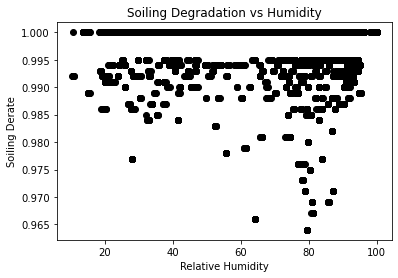

In [53]:
plt.scatter(df_filtered_2.loc[:,["Relative humidity (%RH)"]], df_filtered_2.loc[:, "PV module soiling derate"], color="black") 
plt.xlabel("Relative Humidity")
plt.ylabel("Soiling Derate")
plt.title("Soiling Degradation vs Humidity")

Text(0.5, 1.0, 'Soiling Degradation vs POA Irradiance')

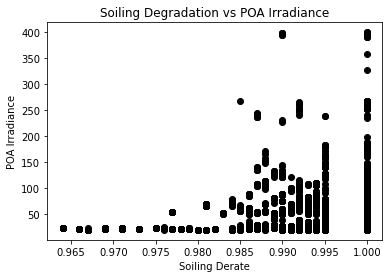

In [56]:
plt.scatter(df_filtered_2.loc[:,["PV module soiling derate"]], df_filtered_2.loc[:, "POA irradiance CMP22 pyranometer (W/m2)"], color="black") 
plt.xlabel("Soiling Derate")
plt.ylabel("POA Irradiance")
plt.title("Soiling Degradation vs POA Irradiance")

Text(0.5, 1.0, 'Back Temperature Effect on Soiling Degradation')

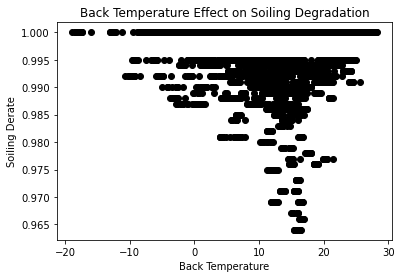

In [57]:
plt.scatter(df_filtered_2.loc[:,["PV module back surface temperature (degC)"]], df_filtered_2.loc[:, "PV module soiling derate"], color="black") 
plt.xlabel("Back Temperature")
plt.ylabel("Soiling Derate")
plt.title("Back Temperature Effect on Soiling Degradation")

count    10192.000000
mean        74.991062
std         21.239646
min         10.300000
25%         68.675000
50%         83.800000
75%         90.200000
max        100.000000
Name: Relative humidity (%RH), dtype: float64


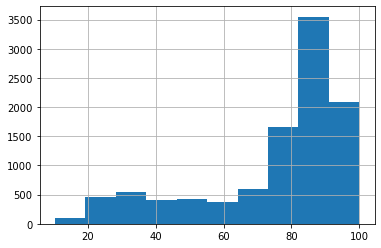

In [35]:
print(df_filtered["Relative humidity (%RH)"].describe())
df_filtered["Relative humidity (%RH)"].hist()

count    10192.000000
mean         0.997752
std          0.004876
min          0.964000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: PV module soiling derate, dtype: float64


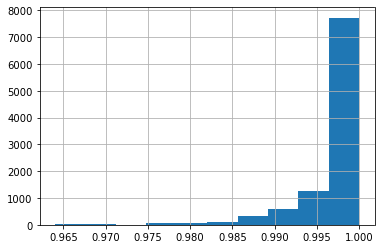

In [36]:
print(df_filtered["PV module soiling derate"].describe())
df_filtered["PV module soiling derate"].hist()

count    11286.000000
mean         0.997620
std          0.004866
min          0.964000
25%          0.995000
50%          1.000000
75%          1.000000
max          1.000000
Name: PV module soiling derate, dtype: float64


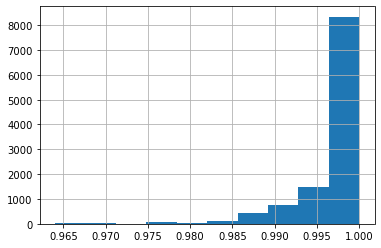

In [26]:
print(df["PV module soiling derate"].describe())
df["PV module soiling derate"].hist()

count    10192.000000
mean        41.818259
std         39.055672
min         20.000000
25%         22.500000
50%         25.900000
75%         53.500000
max       1100.600000
Name: POA irradiance CMP22 pyranometer (W/m2), dtype: float64
398.40450000000055


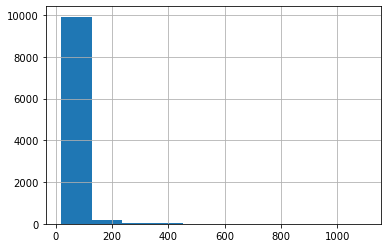

In [38]:
print(df_filtered["POA irradiance CMP22 pyranometer (W/m2)"].describe())
print(df_filtered["POA irradiance CMP22 pyranometer (W/m2)"].quantile(0.999))
df_filtered["POA irradiance CMP22 pyranometer (W/m2)"].hist()

count    11286.000000
mean        44.487852
std         39.186134
min         20.000000
25%         22.800000
50%         27.200000
75%         57.600000
max       1100.600000
Name: POA irradiance CMP22 pyranometer (W/m2), dtype: float64
397.88600000000076


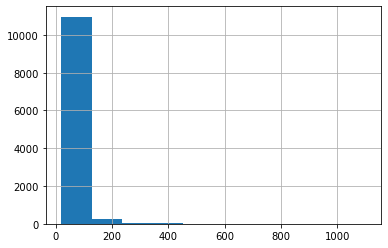

In [33]:
print(df["POA irradiance CMP22 pyranometer (W/m2)"].describe())
print(df["POA irradiance CMP22 pyranometer (W/m2)"].quantile(0.999))
df["POA irradiance CMP22 pyranometer (W/m2)"].hist()

count    11286.000000
mean        12.598627
std          7.848526
min        -18.900000
25%          7.100000
50%         13.000000
75%         18.500000
max         47.700000
Name: PV module back surface temperature (degC), dtype: float64


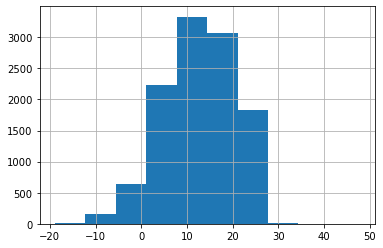

In [54]:
print(df["PV module back surface temperature (degC)"].describe())
#print(df["PV module back surface temperature (degC)"].quantile(0.999))
df["PV module back surface temperature (degC)"].hist()

In [52]:
df.columns

Index(['Time Stamp', 'Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss',
       'POA irradiance CMP22 pyranometer (W/m2)',
       'POA irradiance uncertainty (%)',
       'PV module back surface temperature (degC)',
       'PV module back surface temperature uncertainty (degC)', 'Isc (A)',
       'Isc uncertainty (%)', 'Pmp (W)', 'Pmp uncertainty (%)', 'Imp (A)',
       'Imp uncertainty (%)', 'Vmp (V)', 'Vmp uncertainty (%)', 'Voc (V)',
       'Voc uncertainty (%)', 'FF (%FF)', 'FF uncertainty (%)',
       'Change in CMP22 during I-V scan +/- W/m2',
       'Change in Li-COR during I-V scan +/- W/m2',
       'MT5 cabinet temperature (degC)', 'Dry bulb temperature (degC)',
       'Dry bulb temperature uncertainty (degC)', 'Relative humidity (%RH)',
       'Relative humidity uncertainty (%RH)', 'Atmospheric pressure (mb)',
       'Atmospheric pressure uncertainty (%)',
       'Precipitation (mm) accumulated daily total',
       'Direct normal irradiance (W/m2)',
       'Direct normal 